In [1]:
print("Akshat Jain")

Akshat Jain


# Step-1: Data Pre-processing 
## 1. Importing the required libraries

In [2]:
#Step-1: Data Pre-processing [cite: 334]
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')
from sklearn.preprocessing import LabelEncoder

## 2. Importing the dataset using the pandas library

In [3]:
data = pd.read_csv("loan_prediction.csv")
data.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [4]:
data.shape

(614, 13)

In [5]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


## 3. Handling the missing values

In [6]:
print('Handling missing values in the dataset:')
print(data.isnull().sum())

Handling missing values in the dataset:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


--> Adjustments to remove missing values

In [7]:
# Note: Corrected 'data-data.dropna()' from document
data = data.dropna()

# Note: Corrected 'data.drop([ Loan_ID'], $ax(s=1)$' from document
data.drop(['Loan_ID'], axis=1, inplace=True) # [cite: 371] with 'inplace=True' added for implied logic
data.isnull().sum() 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 4. Exploratory Data Analysis

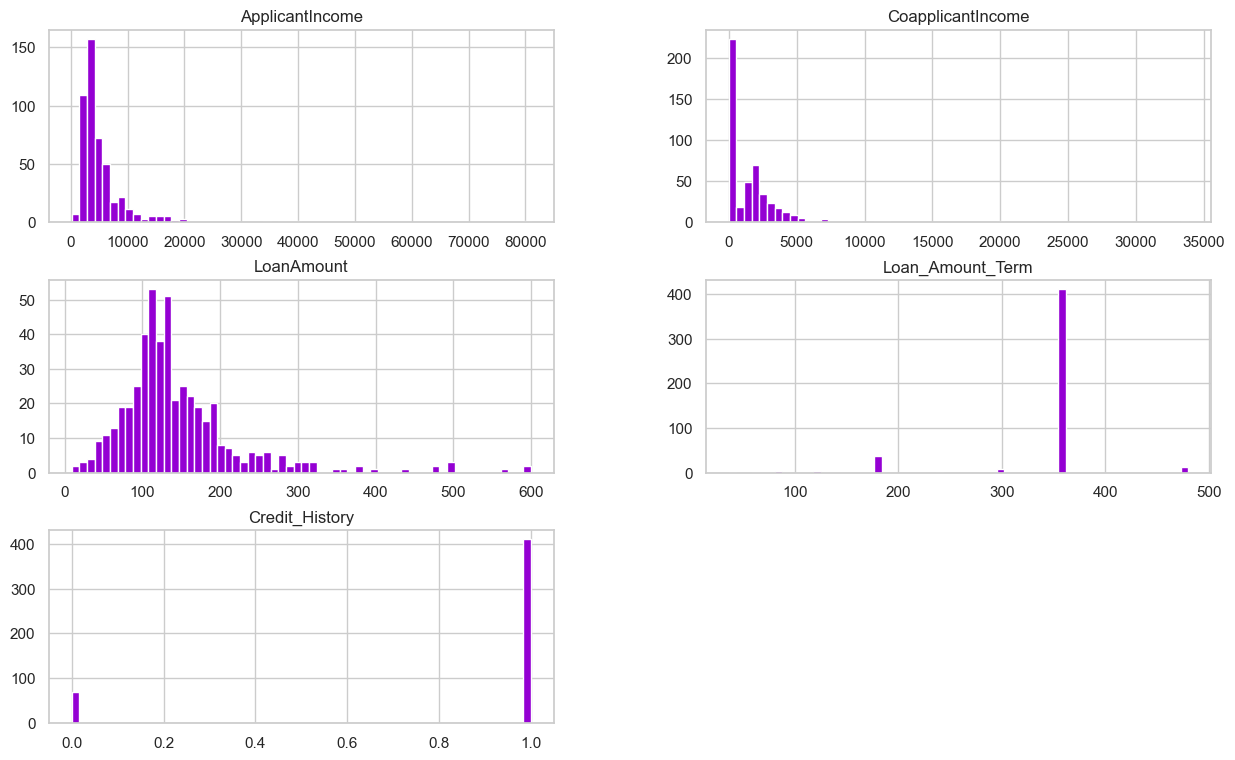

In [ ]:
# Note: Corrected 'bins $15=60$' and 'color= darkviolet'' from document
data.hist(bins=60, figsize=(15,9), color='darkviolet');plt.show()

# Step-2: Creating categorical encoding for 'Gender', 'Married','Dependents','Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'

In [9]:
# Encode categorical variables [cite: 446]
# Note: Corrected 'Self_Employed ,' from document
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                    'Credit_History', 'Property_Area', 'Loan_Status'] 
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Step-3: Extracting independent and dependent variables

In [11]:
#Split the data into features and target variable [cite: 453]
y = data['Loan_Status']
X = data.drop(['Loan_Status'], axis=1)

# Step-4: Splitting the dataset into Training and Testing dataset

In [12]:
# Note: Corrected 'test_size 8.2' from document
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) 

# Step-5: Fitting Random Forest to the Training set

In [13]:
classifier = RandomForestClassifier() 
classifier.fit(X_train, y_train)

RandomForestClassifier()

# Step-6: Predicting the Test Result

In [14]:
y_pred = classifier.predict(X_test) 
y_pred 

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

# Step-7: Test accuracy of the result

In [16]:
# Test accuracy of the result 
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.46      0.59        28\n           1       0.81      0.96      0.88        68\n\n    accuracy                           0.81        96\n   macro avg       0.81      0.71      0.73        96\nweighted avg       0.81      0.81      0.79        96\n'

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13, 15],
       [ 3, 65]])

# Step-8: Finding the Accuracy of the model

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 81.25 %


# Hence, the accuracy of the model is approximate 81%.